# Descenso del gradiente

El descenso del gradiente es un algoritmo de optimización el cual busca minimizar una función de coste arbitraria, la estrategía que utiliza es similar a cuando una persona quiere bajar lo más rápido de una montaña, cada paso que da, lo hace de tal forma que la altura disminuya lo más posible, en otras palabras, camina en la dirección de la pendiente más pronunciada.

<img src="images/gdc.png" alt="Descenso del gradiente" width="800">

Un importante hiperparámetro es la velocidad de aprendizaje (*Learning Rate*), si este es muy bajo el algoritmo se demorará mucho en llegar a un resultado, si es muy alto, puede que nunca llegue a un resultado y diverga de la solución óptima. Otro problema con el cual se enfrenta este algoritmo, es que pueden existir muchos valles o mínimos locales, por lo que es posible que el algoritmo converga a un mínimo diferente al mínimo global, teniendo una solución subóptima. Es importante también que todos los parámetros que se quieran entrenar tengan la misma escala, ya que si llega a haber parámetros con rango de valores mucho más grande, el tiempo en llegar a un resultado aumenta significativamente, lo anterior se ve reflejado en la imagen siguiente.

<img src="images/normalize_gd.png" alt="Descenso del gradiente" width="800">

Un último factor a tener en cuenta es la dimensión del espacio de búsqueda, si se tiene un modelo con miles de parámetros, el encontrar una solución óptima será como intentar descender una montaña de 1000 dimensiones. Teniendo en cuenta los pro y los contras de este algoritmo, procederemos a la teoría e implementación del descenso del gradiente, observaremos tres posibles implementaciones: **Batch GD**, **Semi Batch GD** y **Descenso del gradiente estocástico**

## Batch Gradient Descent

Antes de entrar en detalle a esta técnica, se mostrará a continuación el algoritmo general que se utiliza el descenso del gradiente.

<img src="images/gd_algo1.jpg" alt="Descenso del gradiente" width="500">

De la estructura general del algoritmo, generalmente lo que cambia de un método a otro es el **criterio de término** (El momento en que se decide cuando el algoritmo a llegado a un resultado), y el criterio utilizado para **calcular el gradiente**. Procederemos a definir como se implementa **BGD**, para aquello (y para las otras técnincas) utilizaremos la función de coste que generalmente se utiliza en regresión lineal, la función de coste se muestra a continuación:
$$ J(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^{m} \left( \boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)} \right)^2 $$

Recordando, tenemos que:
- $\boldsymbol{\theta} = [\theta_0, \theta_1, \dots, \theta_n]^T$, son los parámetros del modelo.
- $\boldsymbol{x}^{(i)} = [x_0^{(i)}, x_1^{(i)}, \dots, x_n^{(i)}]$, es el vector de características de la instancia $i$.
- $y^{(i)}$ es la etiqueta de la instancia $i$.
- $m$ es el numero de instancias

Además recordemos que nuestro objetivo es minimizar la función de coste para nuestro modelo de regresión líneal:
$$ \hat{y} = \boldsymbol{\theta}^T\boldsymbol{x} $$
$$\hat{\boldsymbol{\theta}} = Min\left[J(\boldsymbol{\theta})\right] $$

**BGD** se caracteríza porque en cada iteración se utiliza el **conjunto completo de datos** para calcular el gradiente, luego el algoritmo finaliza cuando se han cumplido un numero de iteraciones especificada previamente. Si utilizamos el conjunto completo de datos, tenemos que el gradiente de $J(\boldsymbol{\theta})$ viene dado por:

$$\nabla J(\boldsymbol{\theta}) = \frac{2}{m}\boldsymbol{X}^T\left( \boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y} \right) $$
teniendo esto, el algoritmo de **BGD** quedaría definido de la siguiente manera:

<img src="images/gd_algo2.jpg" alt="Descenso del gradiente" width="300">

`eta` corresponde a la velocidad de aprendizaje. A continuación se muestra la implementación realizada en python.

```python
import numpy as np

# X es el dataset
# y son las etiquetas
# eta es la velocidad de aprendizaje
# n_iter es el numero de iteraciones
def BGD(X, y, eta=0.1, n_iter=100):
    m, features = X.shape
    X_ = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(features, 1)

    for iteration in range(n_iter):
        gradient = 2/m * X_.T @ (X_ @ theta - y)
        theta = theta - eta*gradient

    return theta
```

Pongamos a prueba el algoritmo, utilizando el siguiente dataset:

In [1]:
import numpy as np
instances = 100

intercept = 5
slope = 2

X = 10*np.random.rand(instances, 1)
y = intercept + slope*X + np.random.normal(0, 2, (instances, 1))

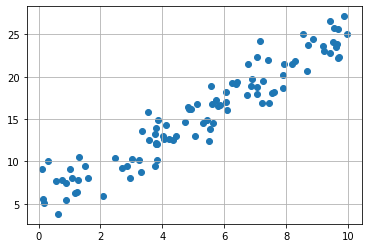

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.grid(b=True)
plt.show()

Nuestro modelo es el siguiente:
$$ \hat{y} = \theta_0 + \theta_1x $$

Por ende:
$$ 
X = 
\begin{bmatrix}
    1 & x^{(1)} \\
    1 & x^{(2)} \\
    \vdots & \vdots \\
    1 & x^{(m)}
\end{bmatrix}
$$
$$ y = [y^{(1)}, y^{(2)}, \dots, y^{(m)}]^T $$

In [3]:
from gradient_descent import BGD

theta = BGD(X, y, eta=0.01, n_iter=10000)
print(f'Theta estimado: {theta}')

Theta estimado: [[5.21052562]
 [1.98341339]]


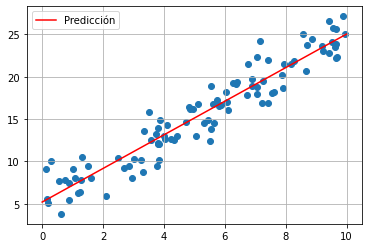

In [4]:
plt.scatter(X, y)

xi = np.linspace(0, 10)
y_hat = theta[0][0] + xi*theta[1][0]
plt.plot(xi, y_hat, label="Predicción", c='r')
plt.grid(b=True)
plt.legend()
plt.show()

Las predicciones son bastantes cercanas! De hecho, si lo comparamos con *sklearn* el resultado debiese ser similar.

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'Intercepto: {lin_reg.intercept_}')
print(f'Pendiente: {lin_reg.coef_}')

Intercepto: [5.21052562]
Pendiente: [[1.98341339]]


Observemos que es lo que pasa cuando el `eta` es muy grande.

In [6]:
theta = BGD(X, y, eta=0.1, n_iter=1000)
print(f'Theta estimado: {theta}')

Theta estimado: [[nan]
 [nan]]


Como podemos ver, diverge, por otro lado si `eta` es muy pequeño, el tiempo de convergencia será grande.

## Descenso del gradiente estocástico
El único inconveniente con **BGD** es que debe utilizar el conjunto de datos completo para realizar el descenso, es por esto que cuando el dataset es bastante grande, el rendimiento de **BGD** disminuye considerablemente. **SGD** (*Stochastic gradient descent*) toma un enfoque totalmente diferente, en vez de en cada iteración utilizar la base de datos completa, solamente utiliza una sola instancia por iteración para calcular el gradiente, esto permite que el algoritmo sea muy rápido, independiente de que tan grande sea el dataset, pero con el sacrificio de que ya no tomará el camino que reduzca al máximo la función de coste, sino que saltara aleatoreamente de un lado a otro, reduciendo en **promedio** la función de coste. Su implementación es la siguiente:

```python
def SGD(X, y, n_epochs=50, t0=5, t1=50):

    m, features = X.shape
    X_ = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(features+1, 1)

    for epoch in range(n_epochs):
        for i in range(m):
            # Seleccionamos una instancia al azar
            random_index = np.random.randint(m)
            xi = X_[random_index, :]
            yi = y[random_index]

            gradient = 2*xi.T @ (xi @ theta - yi)
            eta = learning_schedule(epoch * m + i, t0, t1)
            theta = theta - eta*gradient

    return theta
```

Por convención el algoritmo se ejecuta en rondas, donde cada ronda itera un numero de veces equivalente al numero de instancias. a cada ronda se le llama `epoch`, y por defecto la función ejecuta 50 rondas. En cada iteración dentro de una ronda se escoje un índice al azar para seleccionar una instancia y se calcula el gradiente en base a dicha instancia, luego se utiliza un administrador de aprendizaje para obtener un eta (La idea es que el algoritmo comienze con un `eta` grande y este disminuya gradualmente) para así calcular los nuevos valores de los parámetros. Al ejecutar el código obtenemos el siguiente resultado:

In [7]:
from gradient_descent import SGD
theta = SGD(X, y, n_epochs=100, t0=1, t1=100)
print(f'Resultado: {theta}')

Resultado: [[4.48885517]
 [2.11360309]]


Podemos ver que **SGD** utilizó todo el conjunto de datos unas 100 veces y obtuvo resultados similares a **BGD**, si bien **SGD** es más inestable, su naturaleza aleatorea puede ser util para escapar de mínimos locales y tener más posibilidades de llegar a un mínimo global. *Scikit Learn* implementa este mismo algoritmo y se puede utilizar de la siguiente manera:

In [8]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X, y)

print(f'Intercepto: {sgd_reg.intercept_}')
print(f'Pendiente: {sgd_reg.coef_}')

Intercepto: [4.41645016]
Pendiente: [2.09160252]
